In [19]:
using Revise
using MDToolbox, PyPlot, Statistics, LinearAlgebra
PyPlot.plt.style.use("seaborn-colorblind")
ENV["COLUMNS"] = 110; #display width for MDToolbox

-----

In [20]:
pdb_xtal = mdload("../ground_truth.pdb");

pdb_init = mdload("../prot.pdb");
ta1 = mdload("/data/higashi/grest_4idl_swissmodel_DIHEDRAL/06_grest_production/run_param1_all_s100.nc");
ta = [pdb_init; ta1];

In [21]:
pdb_xtal = pdb_xtal["(atomname CA) and (resid 100:114)"]
pdb_init = pdb_init["(atomname CA) and (resid 100:114)"]
ta = ta["(atomname CA) and (resid 100:114)"];
#ta = ta["(atomname CA) and (resid 20:125)"];

In [22]:
x_xtal = MDToolbox.compute_distancemap(pdb_xtal);
x_init = MDToolbox.compute_distancemap(pdb_init);

In [23]:
X = MDToolbox.compute_distancemap(ta);

In [24]:
X_mean = mean(X, dims=1)

1×78 Matrix{Float64}:
 8.43897  10.3334  11.4759  12.7549  12.4299  11.5146  …  11.1551  12.026  9.05844  10.1531  7.84475

In [25]:
X .= X .- X_mean
e = eigen(X' * X ./ size(X, 1))
lambda = e.values[end:-1:1]
W = e.vectors[:, end:-1:1]
P = X * W

29487×78 Matrix{Float64}:
  6.81497  26.2498       4.1787     9.11662    9.9246   …   0.0985168     0.0547842    0.0307914
 10.0013   25.4039       1.84812    3.83221    7.95531      0.0446207    -0.0436957   -0.0494334
  9.2542   21.6196       4.14331    9.84715   14.6205       0.0512826    -0.0887984    0.0164532
  9.39699  23.8721       2.5439     3.13832    9.10158      0.0912987     0.00233912  -0.0302797
  9.38717  22.6316       1.40376    4.11158   10.8709       0.0759286    -0.00317339   0.00120148
 11.6077   22.6917       1.62178    2.99389   10.683    …   0.115919     -0.00705783  -0.0403774
  9.06492  24.0727       3.08609    4.34957    9.70458      0.0512057    -0.00322304   0.00216629
  9.92455  22.9806       2.10106    2.8442    10.8823       0.0578959    -0.0228595   -0.00911346
  9.56928  25.4371       0.504858   4.49136    6.8591       0.0759856    -0.017381    -0.0525667
 10.0873   27.5498       1.03426    4.74459    5.30295      0.0850962    -0.00813396  -0.0466618
 

In [26]:
p_xtal = (x_xtal .- X_mean) * W
p_init = (x_init .- X_mean) * W

1×78 Matrix{Float64}:
 6.81497  26.2498  4.1787  9.11662  9.9246  2.43099  …  -0.00126271  0.0985168  0.0547842  0.0307914

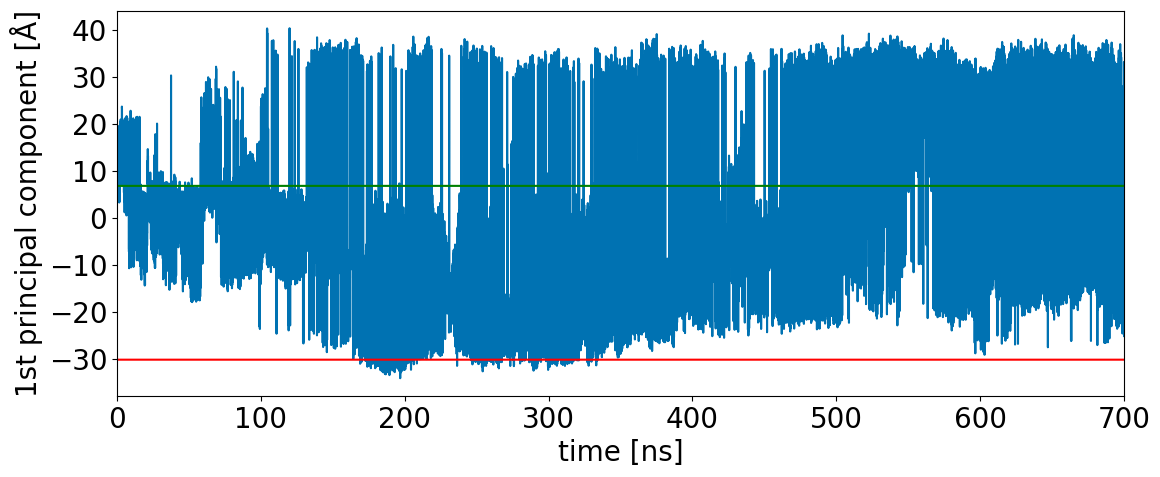

In [40]:
#fig, ax = subplots(figsize=(13, 5));
figure(figsize=(13,5),)
plot((1:size(P, 1)).*0.025*1, P[:, 1])
plot((1:size(P, 1)).*0.025*1, ones(size(P,1))*p_xtal[1], color=:red)
plot((1:size(P, 1)).*0.025*1, ones(size(P,1))*p_init[1], color=:green)
#ax[:set_xlim]([0,100])
xlim([0, 700])
ylabel("1st principal component [Å]",fontsize=20);
xlabel("time [ns]",fontsize=20);
xticks(fontsize=20);
yticks(fontsize=20);
savefig("timeseries_grest.png", dpi=350, bbox_inches="tight");

In [28]:
P

29487×78 Matrix{Float64}:
  6.81497  26.2498       4.1787     9.11662    9.9246   …   0.0985168     0.0547842    0.0307914
 10.0013   25.4039       1.84812    3.83221    7.95531      0.0446207    -0.0436957   -0.0494334
  9.2542   21.6196       4.14331    9.84715   14.6205       0.0512826    -0.0887984    0.0164532
  9.39699  23.8721       2.5439     3.13832    9.10158      0.0912987     0.00233912  -0.0302797
  9.38717  22.6316       1.40376    4.11158   10.8709       0.0759286    -0.00317339   0.00120148
 11.6077   22.6917       1.62178    2.99389   10.683    …   0.115919     -0.00705783  -0.0403774
  9.06492  24.0727       3.08609    4.34957    9.70458      0.0512057    -0.00322304   0.00216629
  9.92455  22.9806       2.10106    2.8442    10.8823       0.0578959    -0.0228595   -0.00911346
  9.56928  25.4371       0.504858   4.49136    6.8591       0.0759856    -0.017381    -0.0525667
 10.0873   27.5498       1.03426    4.74459    5.30295      0.0850962    -0.00813396  -0.0466618
 

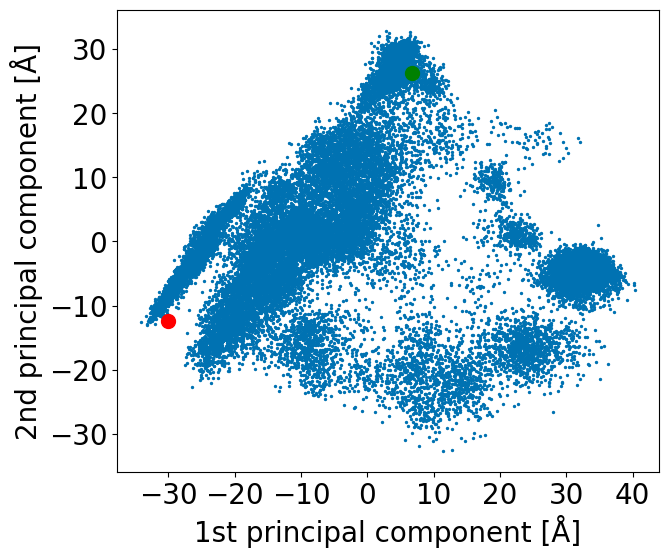

In [29]:
fig, ax = subplots(figsize=(7, 6));
ax.scatter(P[:, 1], P[:, 2], s=2.0);
ax.scatter(p_xtal[1], p_xtal[2], s=100.0, color=:red);
ax.scatter(p_init[1, 1], p_init[1, 2], s=100.0, color=:green);
xlabel("1st principal component [Å]",fontsize=20);
ylabel("2nd principal component [Å]",fontsize=20);

# detailed options (not necessary, just for reference)
#ax.set(xlim=[-20, 10], ylim=[-10, 15]);
#ax.xaxis.set_tick_params(which="major",labelsize=15);
#ax.yaxis.set_tick_params(which="major",labelsize=15);
#ax.grid(linestyle="--", linewidth=0.5);
#tight_layout();

xticks(fontsize=20);
yticks(fontsize=20);

savefig("scatter_grest.png", dpi=350);

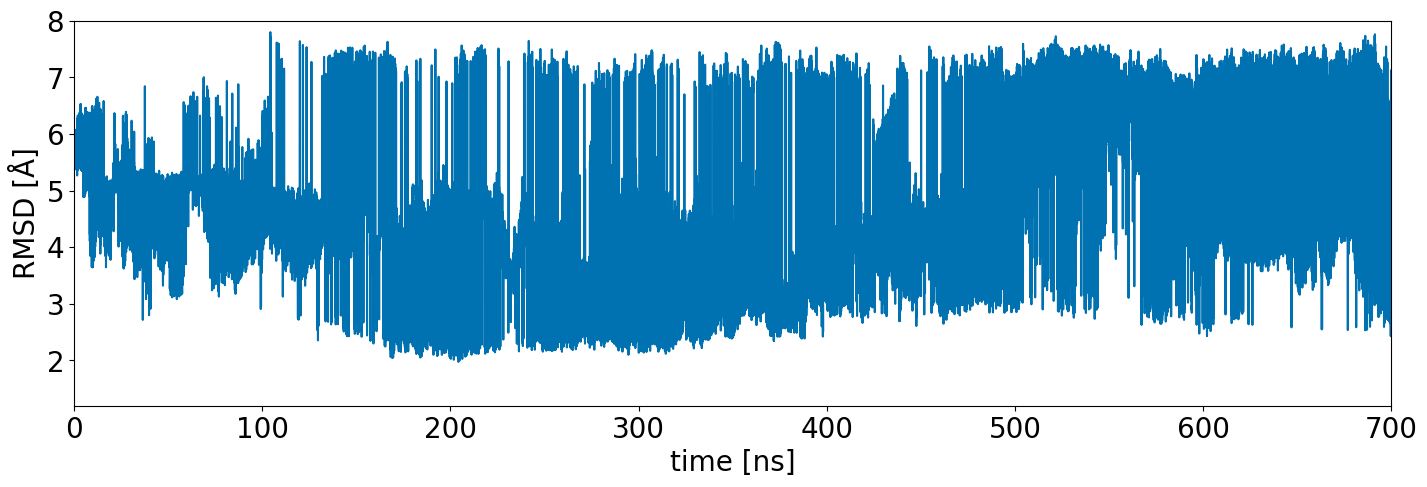

In [50]:
figure(figsize=(17,5),)
ta_fitted = superimpose(pdb_xtal, ta);
rmsd = compute_rmsd(pdb_xtal, ta_fitted)
plot((1:size(P, 1)).*0.025*1, rmsd)
xticks(fontsize=20);
yticks(fontsize=20);
ylabel("RMSD [Å]",fontsize=20);
xlabel("time [ns]",fontsize=20);
ylim([1.2, 8])
#ylim([1.5, 6.5])
xlim([0, 700])
savefig("rmsd_4idlDIHED.png", dpi=350, bbox_inches="tight");